# 6.2 Exploring Relatioships

## The script contains the following
### 1. Importing visualization libraries and data
### 2. Data cleaning
### 3. Exploring relationships
   ####   -Correlations
   ####   -Scatterplots
   ####   -Pair plots
   ####   -Categorical plots


### 1. Importing visualization libraries and data

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [143]:
#define path
path = r'C:/users/localadmin/global_superstore_project'

In [145]:
path

'C:/users/localadmin/global_superstore_project'

In [147]:
#importing superstore data as gs_store
gs_store = pd.read_csv(os.path.join(path,'Data', 'processed_data', 'superstore_cleaned.csv'))

### Cleaning data

In [149]:
gs_store.columns

Index(['Unnamed: 0', 'product_category', 'city', 'country', 'customer_id',
       'customer_name', 'discount', 'market', 'order_date', 'order_id',
       'order_priority', 'product_id', 'product_name', 'profit', 'quantity',
       'region', 'row_id', 'sales', 'segment', 'ship_date', 'ship_mode',
       'shipping_cost', 'state', 'sub_category', 'year', 'market2',
       'week_num'],
      dtype='object')

'Unnamed: 0' must be dropped as it is not standing in for any objective data for the project.

In [151]:
# I drop 'Unnamed: 0' column
gs_store = gs_store.drop('Unnamed: 0', axis =1)

In [153]:
gs_store.dtypes

product_category     object
city                 object
country              object
customer_id          object
customer_name        object
discount            float64
market               object
order_date           object
order_id             object
order_priority       object
product_id           object
product_name         object
profit              float64
quantity              int64
region               object
row_id                int64
sales                 int64
segment              object
ship_date            object
ship_mode            object
shipping_cost       float64
state                object
sub_category         object
year                  int64
market2              object
week_num              int64
dtype: object

'row_id','year', and 'weeek_num' are string variables and this is addressed hereunder.

In [102]:
# the row_id turned into a string variable.
gs_store['row_id'] = gs_store['row_id'].astype('str')
gs_store['year'] = gs_store['year'].astype('str')
gs_store['week_num'] = gs_store['week_num'].astype('str')

Duplicates and missing values were checked in the prior exercise and there were none.

### 3. Exploring relationships

In [165]:
# Creating a subset of the superstore dataser (sales, profit, shipping_cost, discount, and quantity)

sub = gs_store[['sales', 'profit', 'shipping_cost', 'discount','quantity']]

In [167]:
sub.corr()

,sales,profit,shipping_cost,discount,quantity
sales,1.000000,0.484923,0.768075,-0.086728,0.313580
profit,0.484923,1.000000,0.354441,-0.316490,0.104365
shipping_cost,0.768075,0.354441,1.000000,-0.079055,0.272649
discount,-0.086728,-0.316490,-0.079055,1.000000,-0.019875
quantity,0.313580,0.104365,0.272649,-0.019875,1.000000


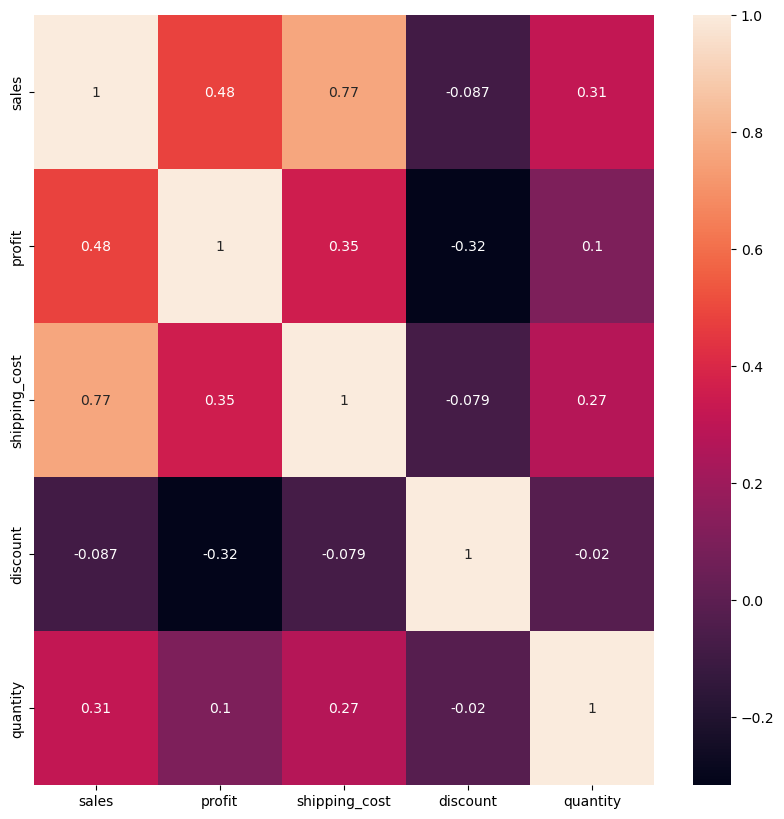

In [170]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

The correlation heatmap shows a strong positive relationship (0.77) betweem sales and shipping cost. This implies that as the sales increase, so are the shipping costs. A moderately strong positive relationship also exits between profit and sales, whilst a weak positive relationship (0.35) exists between profit and shipping cost, sales and qunatity (0.31), shipping cost and quantity (0.27), and profit vs quantity (0.1). Negative and weak correlation subsists between discount and quantity (-0.02), sales and discount(-0.087), profit and discount (-0.32), shipping cost and discount (-0.079), and quantity vs discount (-0.02).

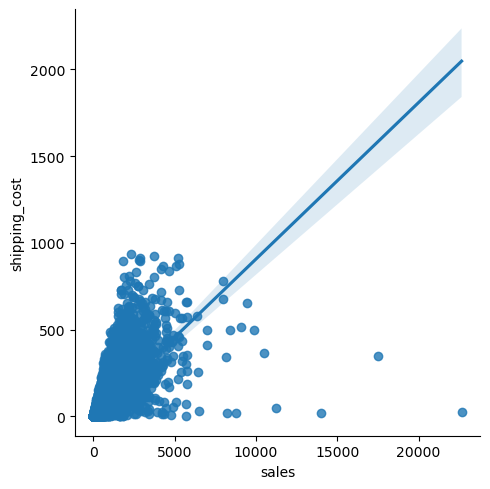

In [183]:
# Create a scatterplot for the "sales" and "shipping_cost" columns in seaborn
sns.lmplot(x = 'sales', y = 'shipping_cost', data = sub)

The variables with the stronegst correlation are sales vs shipping cost and the scatter plot shows a concentration at lower values of sales upto 5000 sales. thereafter, there are outliers that define the line of best fit.

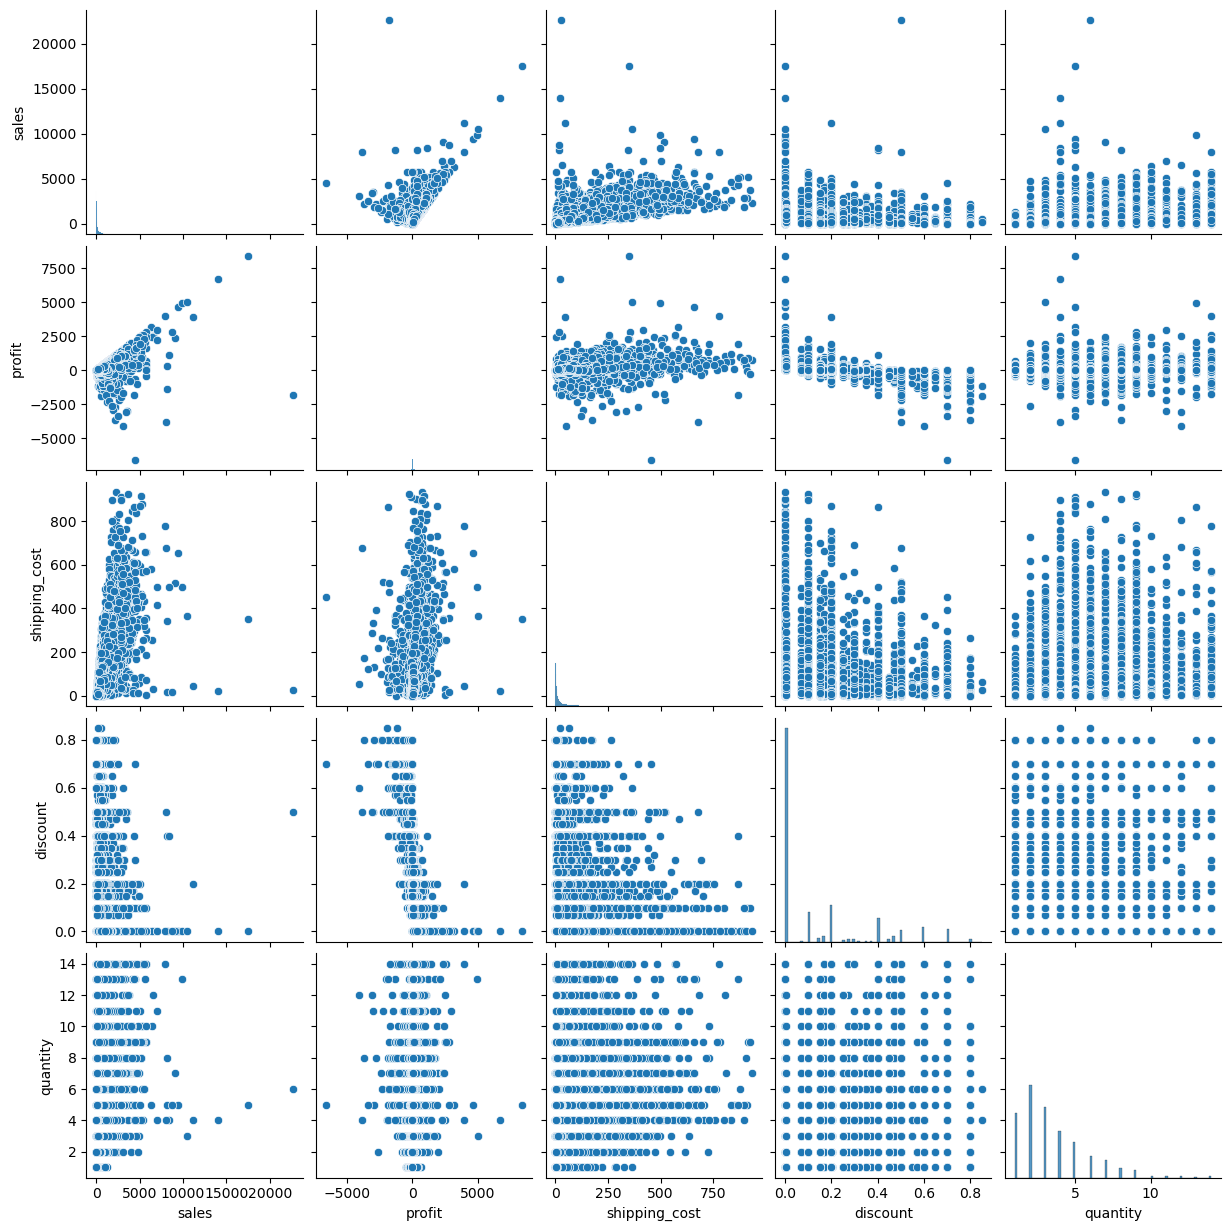

In [112]:
# Create a pair plot 
g = sns.pairplot(sub)

The pair plot shows the interaction between two variables at each instance. For instance, whilst profit can be related to the quantity, it stil is related to discount,shipping cost, and sales. This applies to all variables presented in the pair plot. Unlike correlation, the pair plot provides a wide range of nuances amongst different variables.   

### Creating a categorical plot

<Axes: xlabel='quantity', ylabel='Count'>

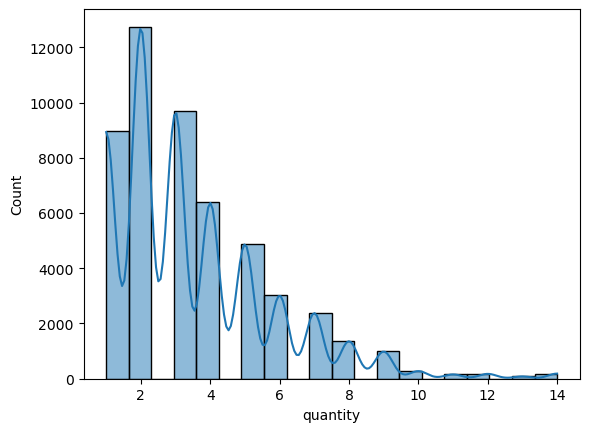

In [213]:
sns.histplot(sub['quantity'], bins = 20, kde = True)

I use the quantity to do the categorical plot

In [191]:
sub.loc[sub['quantity'] < 4, 'quantity category'] = 'low quantity'

In [201]:
sub.loc[(sub['quantity'] >= 4) & (sub['quantity'] < 8), 'quantity category'] = 'medium quantity'

In [205]:
sub.loc[sub['quantity'] >= 8, 'quantity category'] = 'high quantiry'

In [207]:
sub['quantity category'].value_counts(dropna = False)

quantity category
low quantity       31393
medium quantity    16672
high quantiry       3225
Name: count, dtype: int64

#### Categorical Plots

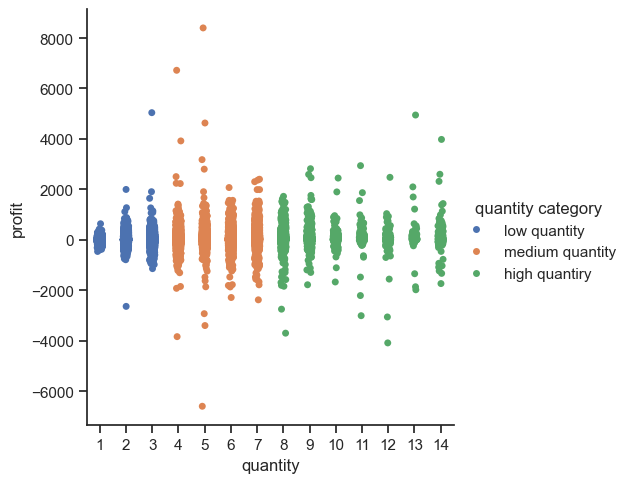

In [219]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="quantity", y="profit", hue="quantity category", data=sub)

The profit is a function of the quantity sold and the greater of the profit is defined by the high quantity in green colour.

### Question 7: Revisit of the questions raised earlier and additional questions.

o	What are the top-performing product categories in terms of sales and profit?
o	How does the profit vary by product category or sub-category?
o	Which cities or countries have the highest average sales and profit?
o	How do discounts impact profit
o	How does order priority affect the shipping costs and delivery times?
o	What are the purchasing patterns of customers based on their location (city, state, country)?
o	How do sales and profits vary across different regions and markets?
o	What impact does shipping mode have on overall sales?
o	Are there seasonal trends in sales and profit across different years?
o	What is the relationship between order quantity and shipping cost?
o	How does shipping cost affect the overall profitability of an order?
o	What are the most common shipping modes used
o	Which products have the highest profits?

New Questions
- does quantity category affect the profit by product category?
- does quantity category affect the shipping cost?
- are shipping modes affected by the shipping cost?


### Question 8: Define any hypotheses that you can at this point. You’ll be testing these later.

Hypothesis: superstore's profits are positively related to the volume of sales.

The hypothesis takes from the supposition that profits are modelled oout of sales and the more the sales, the higher the profits.